In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow

In [2]:
data=pd.read_csv('../data/AdSmartABdata.csv')
data.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
5824,b82328fa-01b7-4399-b2b0-61aa0a93f573,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
2421,4ecd792b-08d9-4f7e-85ea-3418afc71a90,control,2020-07-03,15,Samsung SM-G988B,6,Facebook,1,0
4329,8a831a5c-5261-40a1-8019-4f91452d344d,control,2020-07-08,17,FIG-LX1,6,Chrome Mobile WebView,0,0
7420,eaa902f0-4034-4b03-9d23-d59b842ca0f4,exposed,2020-07-10,11,Generic Smartphone,6,Chrome Mobile,0,0
1667,371305db-e330-4706-83da-aad360d228c7,exposed,2020-07-10,12,Samsung SM-G960F,6,Samsung Internet,0,0


In [3]:
platforms = data['platform_os'].unique()

In [4]:
browsers = data['browser'].unique()
browsers

array(['Chrome Mobile', 'Chrome Mobile WebView', 'Facebook',
       'Mobile Safari', 'Chrome Mobile iOS', 'Samsung Internet',
       'Mobile Safari UI/WKWebView', 'Chrome', 'Opera Mini',
       'Edge Mobile', 'Android', 'Pinterest', 'Opera Mobile',
       'Firefox Mobile', 'Puffin'], dtype=object)

In [5]:
data['clicked'] = data['yes']+data['no']
data = data[data['clicked'] == 1]

In [6]:
chrome = data
chrome.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,clicked
4732,96b855a6-b831-41ee-93d8-869a4c57848c,control,2020-07-05,7,Samsung SM-G977B,6,Facebook,1,0,1
6023,bf3eafd1-c0a5-4824-947b-f9cc5398600e,exposed,2020-07-08,22,Generic Smartphone,6,Chrome Mobile,0,1,1
4648,94217fb4-06db-43b2-a9fe-504e2a284f85,exposed,2020-07-10,1,Samsung SM-A920F,6,Chrome Mobile WebView,0,1,1
839,1b4ca4bc-3a61-4752-ba2d-38a40b2c3eb6,exposed,2020-07-08,17,Generic Smartphone,6,Chrome Mobile,1,0,1
6209,c52dc0bf-7d4e-4ad0-b0ec-17379911c7fd,exposed,2020-07-04,8,Samsung SM-J530F,6,Samsung Internet,1,0,1


In [7]:
os6 = data[data['platform_os'] == 6]
os6.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,clicked
249,078aa8e5-e424-4d57-b5f2-744b2bd702b5,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0,1
1685,3792a1ac-a747-4f2e-aee2-914281717d3f,control,2020-07-04,2,Generic Smartphone,6,Chrome Mobile,1,0,1
434,0d1ad63b-1c43-4d11-adf5-ca5697e6c891,control,2020-07-09,2,Generic Smartphone,6,Chrome Mobile,0,1,1
5018,9fac1676-e216-41f0-b370-3fdc59c7f72e,control,2020-07-07,6,Generic Smartphone,6,Chrome Mobile,1,0,1
3850,7c23951c-6a73-4919-959f-45fa00909ca9,control,2020-07-06,10,Generic Smartphone,6,Chrome Mobile,1,0,1


In [8]:
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    d = df[[x_col]].groupby(x_col).agg({x_col:'count'}).rename(columns = {x_col : 'count'}).reset_index()
    d = d.sort_values(by="count", ascending=False)
    plt.figure(figsize=(12, 7))
    sns.barplot(data = d, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

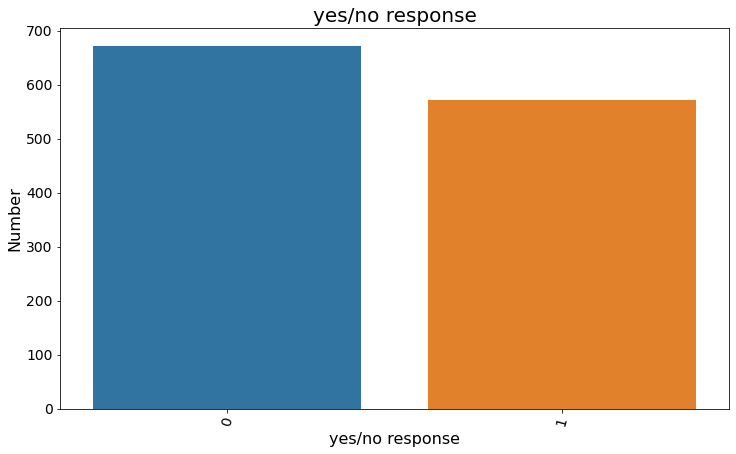

In [9]:
plot_bar(chrome, 'yes', 'count', 'yes/no response', 'yes/no response', 'Number')

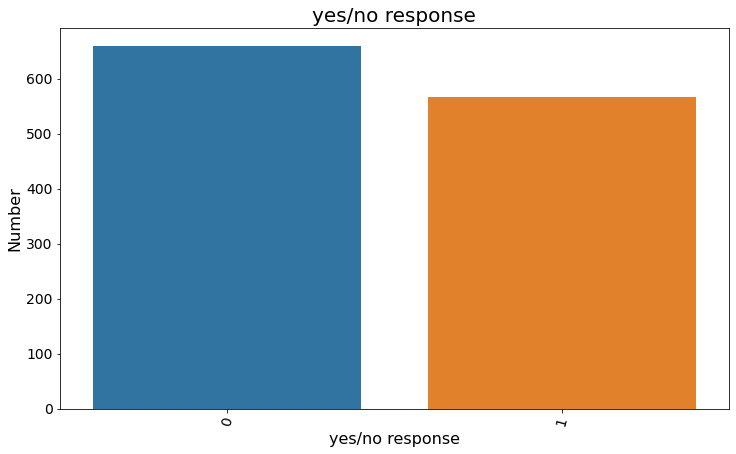

In [10]:
plot_bar(os6, 'yes', 'count', 'yes/no response', 'yes/no response', 'Number')

In [11]:
chrome.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,clicked
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,1


In [12]:

chrome_data = chrome[['experiment','date', 'hour', 'device_make', 'platform_os', 'yes']]

In [13]:
chrome.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
clicked        0
dtype: int64

In [26]:
x = chrome_data[['experiment','date', 'hour', 'device_make', 'platform_os']]
y = chrome_data['yes'].values
x.shape, y.shape

((1243, 5), (1243,))

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x['experiment'] = le.fit_transform(x['experiment'])
x['device_make'] = le.fit_transform(x['device_make'])
x['date'] = le.fit_transform(x['date'])
x.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,experiment,date,hour,device_make,platform_os
2,1,2,2,4,6
16,1,1,16,13,6
20,1,3,8,13,6
23,0,5,4,43,6
27,0,0,15,13,6


### Scaling and Normalization

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(x)

### Train Test split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=25)

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.5180722891566265

<AxesSubplot:>

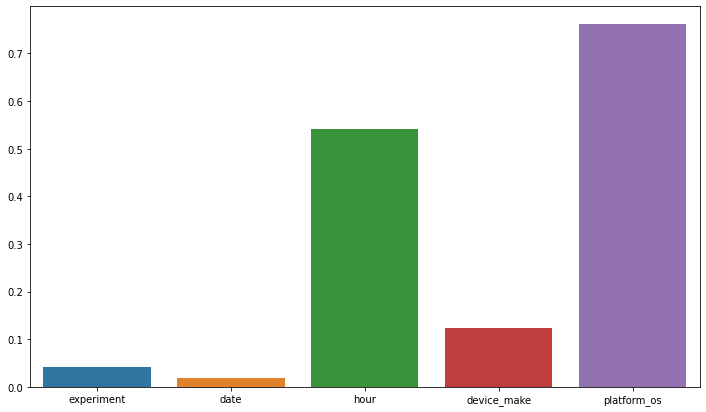

In [42]:
plt.figure(figsize=(12,7))
sns.barplot(x = x.columns, y = reg.coef_[0])

### Decision Trees

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train)

0.8390804597701149

<AxesSubplot:>

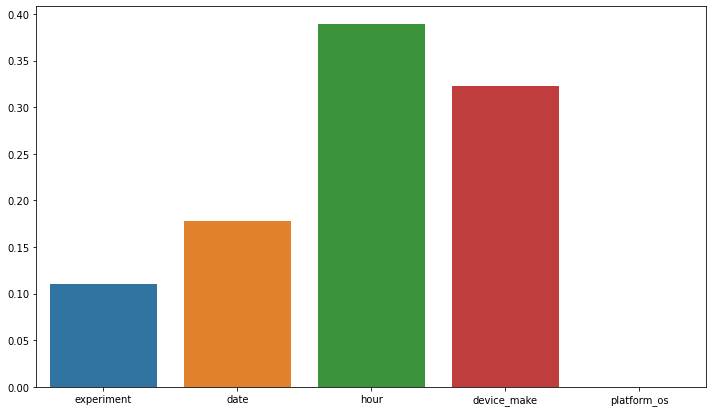

In [41]:
plt.figure(figsize=(12,7))
sns.barplot(x = x.columns, y = dtree.feature_importances_)

### XGBoost Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5180722891566265

<AxesSubplot:>

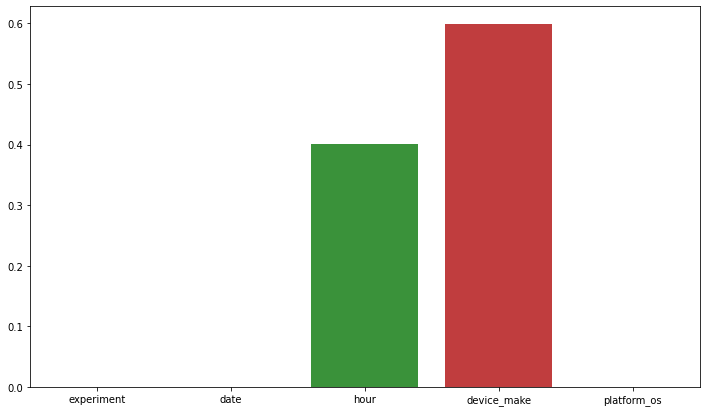

In [40]:
plt.figure(figsize=(12,7))
sns.barplot(x = x.columns, y = clf.feature_importances_)

In [36]:
from sklearn.model_selection import KFold

### Logistic Kfold

In [37]:

kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    with mlflow.start_run(run_name='logistic_kfold', nested = True):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        reg = LogisticRegression().fit(X_train, y_train)
        score = reg.score(X_test, y_test)
        print("score:", score)
        #log model params
        mlflow.log_param("log_reg_score", score)

        # log model
        mlflow.sklearn.log_model(reg, "logistic_regression_models")
        mlflow.end_run()

score: 0.5421686746987951
score: 0.5020080321285141
score: 0.5421686746987951
score: 0.5282258064516129
score: 0.5362903225806451


### Decision Tree KFold

In [38]:
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    with mlflow.start_run(run_name='decision_tree_kfold', nested = True):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dtree = DecisionTreeClassifier()
        dtree.fit(X_train, y_train)
        score = dtree.score(X_test, y_test)
        print("score:",score)

        mlflow.log_param("dtree_score", score)

        # log model
        mlflow.sklearn.log_model(dtree, "decision_tree_models")

score: 0.5421686746987951
score: 0.5020080321285141
score: 0.4979919678714859
score: 0.4879032258064516
score: 0.5766129032258065


### XGBoost KFold

In [39]:
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    with mlflow.start_run(run_name='xgboost_kfold', nested = True):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
        max_depth=1, random_state=0).fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("score:",score)
        mlflow.log_param("xgboost_score", score)

        # log model
        mlflow.sklearn.log_model(reg, "xgboost_models")

score: 0.5180722891566265
score: 0.5140562248995983
score: 0.5060240963855421
score: 0.5040322580645161
score: 0.5362903225806451
